# MODEL TEST
____

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [149]:
import os
#
dataframes_dictionary = {}
directory = 'datas_v2'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Reads only the .csv files
        # Getting the file path
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Use the file name without '.csv' as df name
        var_name = filename[:-4]
        # Storing each dataframe into a dictionary
        dataframes_dictionary[var_name] = df

# Load historical data
df = pd.read_csv('historical_spainPrice.csv')
dataframes_dictionary['historical_spainPrice'] = df
print(df)

              datetime_utc  geo_id geo_name   value
0     2023-12-31T23:00:00Z       3   España   63.33
1     2024-01-01T00:00:00Z       3   España   50.09
2     2024-01-01T01:00:00Z       3   España   47.50
3     2024-01-01T02:00:00Z       3   España   43.50
4     2024-01-01T03:00:00Z       3   España   42.50
...                    ...     ...      ...     ...
7829  2024-11-21T18:00:00Z       3   España  125.01
7830  2024-11-21T19:00:00Z       3   España  122.11
7831  2024-11-21T20:00:00Z       3   España  116.92
7832  2024-11-21T21:00:00Z       3   España  107.74
7833  2024-11-21T22:00:00Z       3   España   87.22

[7834 rows x 4 columns]


In [150]:
for keys in dataframes_dictionary:
    dataframes_dictionary[keys]['datetime_utc'] = pd.to_datetime(dataframes_dictionary[keys]['datetime_utc'])

In [151]:
for keys in dataframes_dictionary:
    duplicates = dataframes_dictionary[keys][dataframes_dictionary[keys].duplicated(subset='datetime_utc',keep=False)] 
    print(duplicates)

Empty DataFrame
Columns: [datetime, datetime_utc, geo_id, geo_name, value]
Index: []
Empty DataFrame
Columns: [datetime, datetime_utc, geo_id, geo_name, value]
Index: []
Empty DataFrame
Columns: [datetime, datetime_utc, geo_id, geo_name, value]
Index: []
Empty DataFrame
Columns: [datetime, datetime_utc, geo_id, geo_name, value]
Index: []
                  datetime_utc  geo_id geo_name   value
744  2024-01-31 23:00:00+00:00       3   España   69.00
745  2024-01-31 23:00:00+00:00       3   España   69.00
1441 2024-02-29 23:00:00+00:00       3   España    2.17
1442 2024-02-29 23:00:00+00:00       3   España    2.17
2185 2024-03-31 22:00:00+00:00       3   España    0.70
2186 2024-03-31 22:00:00+00:00       3   España    0.70
2906 2024-04-30 22:00:00+00:00       3   España   35.01
2907 2024-04-30 22:00:00+00:00       3   España   35.01
3651 2024-05-31 22:00:00+00:00       3   España    4.99
3652 2024-05-31 22:00:00+00:00       3   España    4.99
4372 2024-06-30 22:00:00+00:00       3   Esp

In [152]:
for keys in dataframes_dictionary:
    dataframes_dictionary[keys] = dataframes_dictionary[keys].drop_duplicates(subset='datetime_utc',keep='last')

In [153]:
for keys in dataframes_dictionary:
    dataframes_dictionary[keys] = dataframes_dictionary[keys].set_index('datetime_utc')
    dataframes_dictionary[keys] = dataframes_dictionary[keys].sort_index()

In [154]:
# Rename the 'value' columns in each DataFrame to reflect their data source
for keys in dataframes_dictionary:
    dataframes_dictionary[keys] = dataframes_dictionary[keys].rename(columns={'value': f'{keys}'})

# Concatenate the DataFrames, aligning on the index of prices_DA_full
dataframes_to_concat = [dataframes_dictionary['historical_spainPrice']['historical_spainPrice']]  # Start with the prices DataFrame

# Add the renamed DataFrames from the dataframes_dictionnary to the list
for keys in dataframes_dictionary:
    if keys != 'historical_spainPrice':
        dataframes_to_concat.extend([dataframes_dictionary[keys][keys]])

full_data = pd.concat(dataframes_to_concat, axis=1)

# Display the concatenated DataFrame
full_data

,historical_spainPrice,WIND_D+1_DAILY_FORECAST,DEMAND_D+1_DAILY_FORECAST,PHOTOVOLTAIC_D+1_DAILY_FORECAST,SOLAR_THERMAL_FORECAST
datetime_utc,,,,,
2023-12-31 23:00:00+00:00,63.33,4702.8,21638.0,0.0,6.500000
2024-01-01 00:00:00+00:00,50.09,4626.0,20746.8,0.0,0.000000
2024-01-01 01:00:00+00:00,47.50,4489.0,19292.3,0.0,0.000000
2024-01-01 02:00:00+00:00,43.50,4359.5,18262.3,0.0,1.000000
2024-01-01 03:00:00+00:00,42.50,4371.0,17620.5,0.0,2.950000
...,...,...,...,...,...
2024-11-27 23:00:00+00:00,NaN,3188.5,24675.0,0.0,72.750000
2024-11-28 00:00:00+00:00,NaN,3164.0,23504.8,0.0,68.500000
2024-11-28 01:00:00+00:00,NaN,3218.5,22463.5,0.0,32.000000


In [155]:
with_nan = full_data[full_data.isna().any(axis=1)]

# Affichage des lignes contenant des NaN
print("Lignes supprimées :")
print(with_nan)
full_data.dropna(inplace=True)

Lignes supprimées :
                           historical_spainPrice  WIND_D+1_DAILY_FORECAST  \
datetime_utc                                                                
2024-11-21 23:00:00+00:00                    NaN                  16286.5   
2024-11-22 00:00:00+00:00                    NaN                  16041.3   
2024-11-22 01:00:00+00:00                    NaN                  15620.5   
2024-11-22 02:00:00+00:00                    NaN                  15214.8   
2024-11-22 03:00:00+00:00                    NaN                  14845.0   
...                                          ...                      ...   
2024-11-27 23:00:00+00:00                    NaN                   3188.5   
2024-11-28 00:00:00+00:00                    NaN                   3164.0   
2024-11-28 01:00:00+00:00                    NaN                   3218.5   
2024-11-28 02:00:00+00:00                    NaN                   3329.0   
2024-11-28 03:00:00+00:00                    NaN        

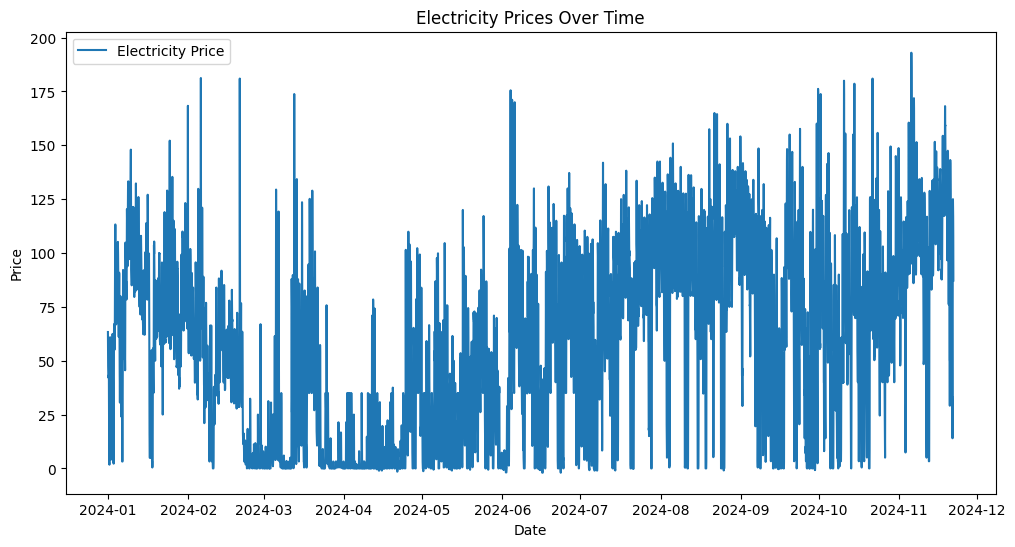

In [156]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(full_data['historical_spainPrice'], label='Electricity Price')
plt.title('Electricity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [168]:
# Preprocess the data: Normalize datas
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(full_data['historical_spainPrice'].values.reshape(-1,1))

In [169]:
# Create sequences
FORECAST_HORIZON = 24  # Predict the next 24 hours
SEQ_LENGTH = 30 * 24  # 30 days of hourly data (30 * 24)

def create_sequences(data, seq_length, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_horizon):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length:i + seq_length + forecast_horizon, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LENGTH, FORECAST_HORIZON)

In [170]:
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,
                                                    shuffle=True)

In [172]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(y_train.shape[1])
])

# Hyperparameter optimization is missing
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 720, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 24)             │           624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,499 (126.95 KB)

 Trainable params: 32,499 (126.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - loss: 0.0759 - val_loss: 0.0259
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 39s 253ms/step - loss: 0.0238 - val_loss: 0.0192
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - loss: 0.0191 - val_loss: 0.0172
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - loss: 0.0158 - val_loss: 0.0159
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - loss: 0.0145 - val_loss: 0.0142
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - loss: 0.0134 - val_loss: 0.0126
plot7


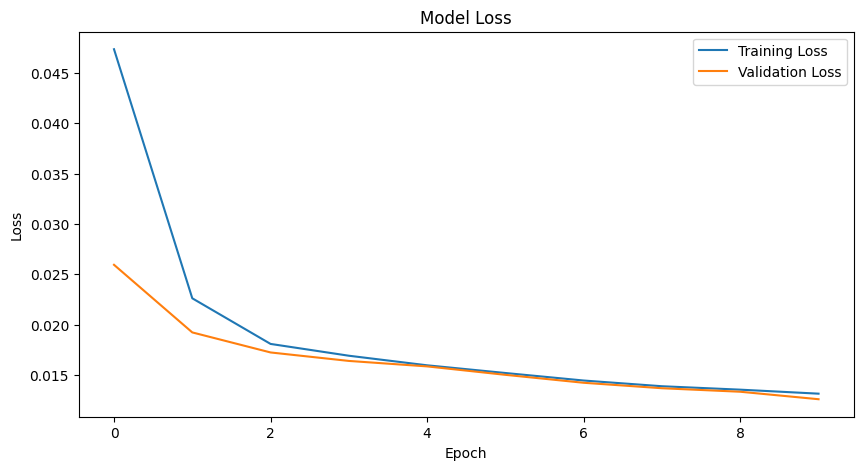

plot8


In [173]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

print('plot7')

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('plot8')

In [174]:
# Make predictions
predictions = model.predict(X_test) 
#predictions = scaler.inverse_transform(predictions)  # Undo scaling
#y_test_actual = scaler.inverse_transform(y_test.reshape(-1, FORECAST_HORIZON))

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step


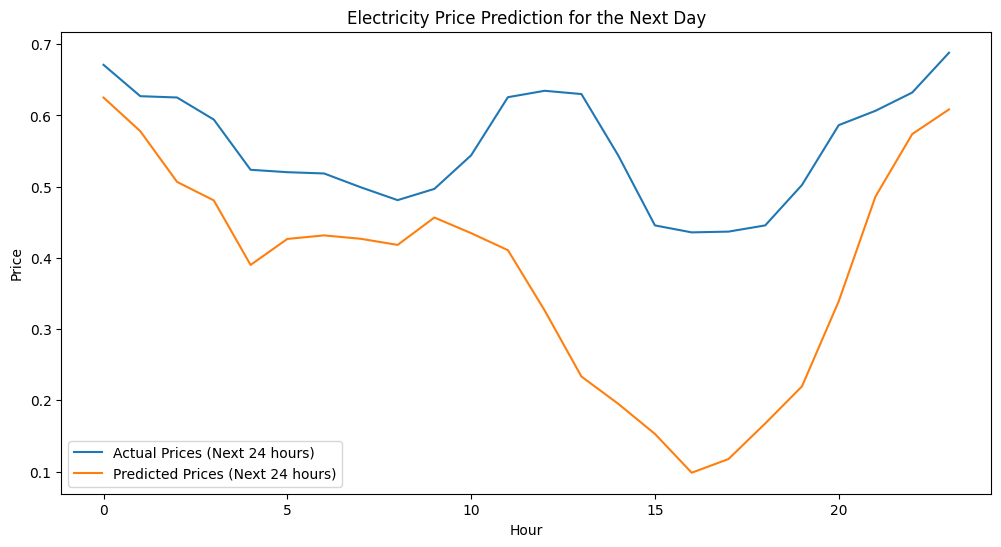

plot10


In [175]:
# Plot predictions vs. actual
plt.figure(figsize=(12, 6))
plt.plot(y_test[0], label='Actual Prices (Next 24 hours)')
plt.plot(predictions[0], label='Predicted Prices (Next 24 hours)')
plt.title('Electricity Price Prediction for the Next Day')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.legend()
plt.show()
print('plot10')

In [147]:
# Predict the next day's price
last_sequence = scaled_data[-SEQ_LENGTH:]  # Last 30 days of hourly data
last_sequence = np.expand_dims(last_sequence, axis=0)  # Reshape for LSTM
next_day_scaled = model.predict(last_sequence)
next_day_prices = scaler.inverse_transform(next_day_scaled)
print(f"Predicted electricity prices for the next 24 hours: {next_day_prices[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


ValueError: operands could not be broadcast together with shapes (1,24) (5,) (1,24) 